In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
path = r"C:\Users\IsmailKaraman\workspace\data\dogus_datathon_21\\"

In [3]:
customer                =  pd.read_csv(path+'FINAL_CUSTOMER_DATATHON.csv', index_col='Unnamed: 0')
customer_related_table  =  pd.read_csv(path+'FINAL_CUSTOMER_RELATED_TABLE_FOR_DATATHON.csv', index_col='Unnamed: 0', parse_dates=['START_DATE', 'END_DATE'])
sales_file              =  pd.read_csv(path+'FINAL_SALES_FILE_DATATHON.csv', index_col='Unnamed: 0', parse_dates=['SF_CREATE_DATE'])
sifir_arac_alanlar      =  pd.read_csv(path+'FINAL_SIFIR_ARAC_ALANLAR_DATATHON.csv', index_col='Unnamed: 0', parse_dates=['CREATE_DATE'])
vehicle_table           =  pd.read_csv(path+'FINAL_VEHICLE_TABLE_DATATHON.csv', index_col='Unnamed: 0', parse_dates=['TRAFFIC_DATE'])
mask_servis_bakim       =  pd.read_csv(path+'MASK_SERVIS_BAKIM_DATATHON_FINAL.csv', index_col='Unnamed: 0',  parse_dates=['CREATE_DATE'])
sample_submission_raw   =  pd.read_csv(path+'sample_submission.csv')

C:\Users\IsmailKaraman\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## FINAL_CUSTOMER_DATATHON

In [4]:
customer.head()

BASE_CUSTOMER_ID  CUSTOMER_ID GENDER  GENDER_ID MARITAL_STATUS  \
0            158891      1747700  Erkek        100            NaN   
1            169233      1710561  Erkek        100           Evli   
2             30887      1043923  Erkek        100           Evli   
3             38013      1101926  Erkek        100            NaN   
4            157091      1819787  Kadın        101            NaN   

   MARITAL_STATUS_ID  BIRTH_DATE FK_ADDRESS_COMMUNICATION_CITY  \
0                  0         NaN                           NaN   
1                101      1962.0                       Erzurum   
2                101      1971.0                      İstanbul   
3                  0         NaN                        Manisa   
4                  0         NaN                        Ankara   

           OCCUPATION  
0                 NaN  
1  Öğretmen / Eğitmen  
2               Esnaf  
3                 NaN  
4                 NaN

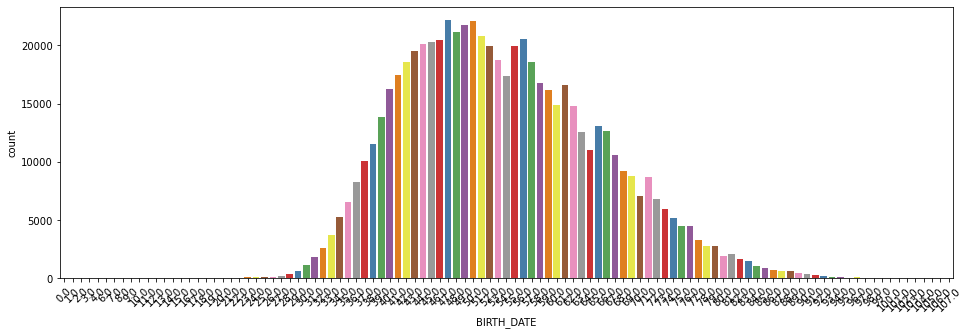

In [5]:
plt.figure(figsize=(16,5))
chart = sns.countplot(
    data=pd.DataFrame(2021-customer['BIRTH_DATE']),
    x='BIRTH_DATE',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

None #don't show the label objects

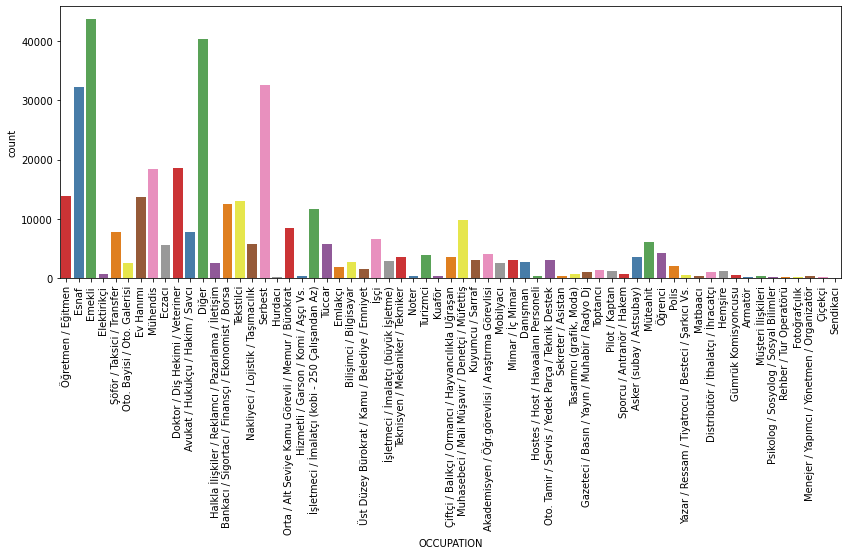

In [6]:
plt.figure(figsize=(14,5))
chart = sns.countplot(
    data=customer,
    x='OCCUPATION',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

None #don't show thea label objects

In [7]:
replace_for_cities = {'DÜZCE':'Düzce', 'BİNGÖL':'Bingöl', 'SİVAS':'Sivas', 'BİLİNMEYEN':'wronginfo', 'X':'wronginfo',
                      'Alm':'Almanya', 'KÜTAHYA':'Kütahya', 'bursa':'Bursa', 'ist':'İstanbul', 'L':'wronginfo', 
                      'istanbul':'İstanbul', 'DİYARBAKIR':'Diyarbakır', 'DİĞER':'wronginfo', 'z':'wronginfo',
                      'nahçıvan':'Nahçıvan', 'RİZE':'Rize', 'girne':'GİRNE', 'Merkez':'wronginfo',
                      'Asd':'wronginfo', 'Lefkoşe':'Lefkoşa', 'z':'wronginfo'}

customer["FK_ADDRESS_COMMUNICATION_CITY"]=customer["FK_ADDRESS_COMMUNICATION_CITY"].replace(replace_for_cities)

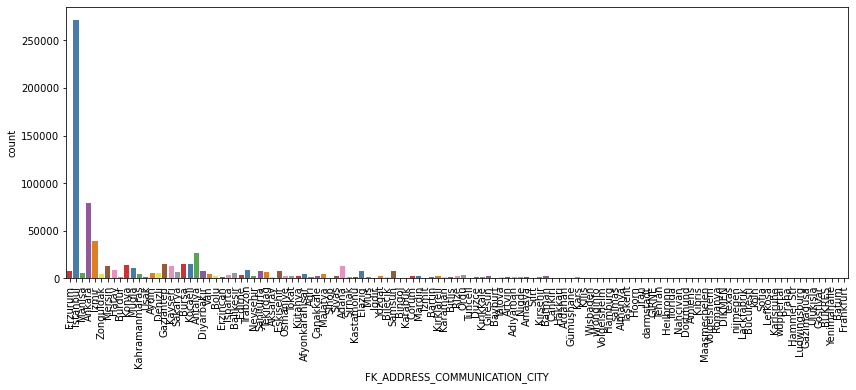

In [8]:
plt.figure(figsize=(14,5))
chart = sns.countplot(
    data=customer,
    x='FK_ADDRESS_COMMUNICATION_CITY',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

None #don't show thea label objects

## FINAL_CUSTOMER_RELATED_TABLE_FOR_DATATHON

In [9]:
customer_related_table.head()

BASE_CUSTOMER_ID  VEHICLE_ID START_DATE   END_DATE  FK_RELATION_STATUS_ID  \
0            189537     5321560 2018-07-24 2019-07-03                      2   
1            110802     5329278 2019-07-16        NaT                      1   
2            160615     5329282 2019-09-12        NaT                      1   
3            115664     5328513 2019-02-25        NaT                      1   
4             81061     5322264 2018-04-16        NaT                      1   

  FK_RELATION_STATUS_EXPLANATION  
0            Pasif Ruhsat Sahibi  
1            Aktif Ruhsat Sahibi  
2            Aktif Ruhsat Sahibi  
3            Aktif Ruhsat Sahibi  
4            Aktif Ruhsat Sahibi

In [10]:
customer_related_table['FK_RELATION_STATUS_EXPLANATION'].value_counts()

Aktif Ruhsat Sahibi    215122
Pasif Ruhsat Sahibi    159757
Name: FK_RELATION_STATUS_EXPLANATION, dtype: int64

In [11]:
customer_related_table.shape

(374879, 6)

In [12]:
customer_related_table['BASE_CUSTOMER_ID'].value_counts()

185023    467
40711     374
53        317
169494    314
177297    292
         ... 
11115       1
13160       1
19303       1
23397       1
53094       1
Name: BASE_CUSTOMER_ID, Length: 196538, dtype: int64

In [13]:
customer_related_table[customer_related_table['BASE_CUSTOMER_ID']==189537].shape

(47, 6)

## FINAL_SALES_FILE_DATATHON

In [14]:
sales_file

CUSTOMER_ID  SALESFILE_ID      SF_CREATE_DATE  STATUS REQ_BRAND_CODE  \
0           1712792     7274467.0 2017-11-17 12:15:39     101              Y   
1           1149729     4839430.0 2015-11-11 17:03:28     102              K   
2           1697993     4847398.0 2015-11-14 11:15:51     102              Y   
3           1680258     3817349.0 2014-12-23 17:26:09     105              Y   
4           1244973     8079074.0 2018-08-28 12:55:04     101              K   
...             ...           ...                 ...     ...            ...   
397521      1151001     3504117.0 2014-09-17 12:30:13     102              K   
397522      1581191     3518578.0 2014-09-22 20:14:38     105              K   
397523      1535801     3526258.0 2014-09-25 12:01:58     102              T   
397524      1205995     6592609.0 2017-04-14 15:40:44     105              X   
397525      1501605     6614631.0 2017-04-22 11:42:48     102              K   

        REQ_TOPMODEL_CODE  
0                  9231.0  
1                  9184.0  
2                  9231.0  
3                  9362.0  
4                  9901.0  
...                   ...  
397521             9435.0  
397522             9176.0  
397523             9352.0  
397524             9523.0  
397525             9898.0  

[397526 rows x 6 columns]

In [15]:
sales_file['STATUS'].unique()

array([101, 102, 105, 100, 109, 106], dtype=int64)

## FINAL_SIFIR_ARAC_ALANLAR_DATATHON

In [16]:
sifir_arac_alanlar['year'] = sifir_arac_alanlar['CREATE_DATE'].dt.year.astype(str)
sifir_arac_alanlar['month'] = sifir_arac_alanlar['CREATE_DATE'].dt.month.astype(str)
sifir_arac_alanlar['weekday'] = sifir_arac_alanlar['CREATE_DATE'].dt.weekday.astype(str)
sifir_arac_alanlar['week'] = sifir_arac_alanlar['CREATE_DATE'].dt.week.astype(str)

<ipython-input-16-31a25b1d6604>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  sifir_arac_alanlar['week'] = sifir_arac_alanlar['CREATE_DATE'].dt.week.astype(str)


In [17]:
sifir_arac_alanlar

VEHICLE_ID  CUSTOMER_ID         CREATE_DATE  year month weekday week
0          5015193      1063740 2005-01-01 19:08:33  2005     1       5   53
1          5110231      1155678 2005-09-29 17:16:15  2005     9       3   39
2          5290356      1737831 2016-04-29 13:12:10  2016     4       4   17
3          5344576      1841362 2021-03-16 13:39:01  2021     3       1   11
4          5094010      1066916 2005-04-20 09:51:19  2005     4       2   16
...            ...          ...                 ...   ...   ...     ...  ...
169520     5160829      1269016 2009-06-10 16:16:15  2009     6       2   24
169521     5098542      1157563 2005-08-01 12:07:57  2005     8       0   31
169522     5148086      1156732 2007-12-28 17:15:09  2007    12       4   52
169523     5263144      1032834 2015-06-24 11:19:15  2015     6       2   26
169524     5026911      1058351 2005-01-01 14:46:45  2005     1       5   53

[169525 rows x 7 columns]

## FINAL_VEHICLE_TABLE_DATATHON

In [18]:
vehicle_table.head(5)

VEHICLE_ID TRAFFIC_DATE BRAND_CODE  BASEMODEL_CODE  TOPMODEL_CODE  \
0     5317713   2017-12-07          Z           13398           9349   
1     5259212   2014-12-09          X           15694           9524   
2     5110414   2005-12-12          Y           11183           9118   
3     5101263   2005-08-23          X           15039           9495   
4     5053909   2003-04-09          Y           12255           9219   

     MOTOR_GAS_TYPE   GEAR_BOX_TYPE  
0            Benzin          Manuel  
1             Dizel  Otomatik (DSG)  
2  Kurşunsuz Benzin        Otomatik  
3            Benzin          Manuel  
4               NaN             NaN

In [19]:
replace_for_gear_box_type = {'manuel':'Manuel', 'Otomatik (DSG)':'Otomatik(DSG)', 'Otomatik (DSG Şanzuman)':'Otomatik(DSG)',
                      'Otomaik':'Otomatik', '?automatisch':'Otomatik', 'Sürekli değişken':'Sürekli-Değişken', 
                       'Sürekli Değişken':'Sürekli-Değişken',
                      'Otomatik Değişken':'Otomatik', 'Düz':'Manuel', '?Handschaltung':'Manuel', 'Mekanik':'Manuel'}
vehicle_table["GEAR_BOX_TYPE"]=vehicle_table["GEAR_BOX_TYPE"].replace(replace_for_gear_box_type)

In [20]:
replace_for_gas_type = {'?Benzin':'Benzin', 'Kurşunsuz benzin':'Benzin',
                      'Benzin/Hybrid':'Benzin/Hibrit', 'Diesel':'Dizel'}
vehicle_table["MOTOR_GAS_TYPE"]=vehicle_table["MOTOR_GAS_TYPE"].replace(replace_for_gas_type)

## MASK_SERVIS_BAKIM_DATATHON_FINAL

In [21]:
%%script False
mask_servis_bakim.sort_values('CREATE_DATE', inplace=True)
mask_servis_bakim.groupby(['VEHICLE_ID', 'IS_MAINTENANCE'])['CREATE_DATE'].diff().reset_index()

Couldn't find program: 'False'


In [22]:
mask_servis_bakim

CREATE_DATE  IS_MAINTENANCE  VEHICLE_ID  TOTAL_AMOUNT_TL
0       2010-12-29 10:50:56               1     5000001            192.0
1       2013-08-21 10:34:21               1     5000001            267.0
2       2015-11-30 10:55:00               1     5000001           1747.0
3       2015-12-09 13:38:49               0     5000001            465.0
4       2017-11-23 09:53:22               1     5000001            549.0
...                     ...             ...         ...              ...
1040995 2021-05-20 14:58:31               0     5344976           1180.0
1040996 2021-05-24 09:57:34               0     5344981              0.0
1040997 2021-05-25 12:44:02               0     5344999           3258.0
1040998 2021-05-27 09:45:00               0     5345037              1.0
1040999 2021-05-28 13:46:36               0     5345048            604.0

[1041000 rows x 4 columns]

### monthly check

In [23]:
unq_custs = pd.DataFrame(customer.BASE_CUSTOMER_ID.unique(), columns=['BASE_CUSTOMER_ID'])
unq_custs['key'] = 1
dates = pd.DataFrame(pd.date_range('2010-01', '2021-05', freq='M'), columns=['date'])
dates['key'] = 1
customer_data = pd.merge(unq_custs, dates, on=['key'])

In [24]:
customer_related_table['END_DATE'] = customer_related_table['END_DATE'].fillna(pd.Timestamp('2021-05-31'))

In [25]:
car_ownership = pd.merge(customer_data, customer_related_table, on=['BASE_CUSTOMER_ID'], how='left')
car_ownership = car_ownership[car_ownership['date']>car_ownership['START_DATE']]
car_ownership.loc[car_ownership['date']>car_ownership['END_DATE'], 'status'] = 0 # passive ownership
car_ownership.loc[car_ownership['date']<car_ownership['END_DATE'], 'status'] = 1 # active ownership

In [26]:
act_indexes = car_ownership[car_ownership['status']==1].index
pass_indexes = car_ownership[car_ownership['status']==0].index
car_ownership.loc[act_indexes, 'ownership_period'] = car_ownership.loc[act_indexes, 'date']-car_ownership.loc[act_indexes, 'START_DATE']
car_ownership.loc[pass_indexes, 'ownership_period'] = car_ownership.loc[pass_indexes, 'END_DATE']-car_ownership.loc[pass_indexes, 'START_DATE']

In [27]:
car_ownership['ownership_month'] = car_ownership['START_DATE'].dt.month.astype(str)
car_ownership['status2'] = car_ownership['status']
car_ownership['ownership_period'] = car_ownership['ownership_period'].dt.days

In [28]:
car_ownership_summary = car_ownership.groupby(['BASE_CUSTOMER_ID', 'date']).agg({'status':'sum', 
                                                        'status2':'count', 
                                                        'ownership_period':'mean',
                                                        'ownership_month': lambda x: ' '.join(x)}).reset_index()
car_ownership_summary.columns = ['BASE_CUSTOMER_ID', 'date', 'active_cars', 'all_cars', 'avg_ownership_period', 'ownership_months']
# VEHICLE_ID kullanılarak araçla ilgili bilgiler ve servisle ilgili bilgiler çekilebilir

In [29]:
sales_file = pd.merge(sales_file, customer[['BASE_CUSTOMER_ID', 'CUSTOMER_ID']], on=['CUSTOMER_ID'], how='left')

In [30]:
customer_data['end_of_month'] = customer_data['date']
customer_data['beginning_of_month'] = customer_data['date'].apply(lambda x: pd.Timestamp(x.year, x.month, 1))

In [31]:
customer_sales_df = pd.merge(customer_data, sales_file, on=['BASE_CUSTOMER_ID'], how='left')

In [32]:
sales_file

CUSTOMER_ID  SALESFILE_ID      SF_CREATE_DATE  STATUS REQ_BRAND_CODE  \
0           1712792     7274467.0 2017-11-17 12:15:39     101              Y   
1           1149729     4839430.0 2015-11-11 17:03:28     102              K   
2           1697993     4847398.0 2015-11-14 11:15:51     102              Y   
3           1680258     3817349.0 2014-12-23 17:26:09     105              Y   
4           1244973     8079074.0 2018-08-28 12:55:04     101              K   
...             ...           ...                 ...     ...            ...   
397521      1151001     3504117.0 2014-09-17 12:30:13     102              K   
397522      1581191     3518578.0 2014-09-22 20:14:38     105              K   
397523      1535801     3526258.0 2014-09-25 12:01:58     102              T   
397524      1205995     6592609.0 2017-04-14 15:40:44     105              X   
397525      1501605     6614631.0 2017-04-22 11:42:48     102              K   

        REQ_TOPMODEL_CODE  BASE_CUSTOMER_ID  
0                  9231.0             31024  
1                  9184.0             34723  
2                  9231.0            133025  
3                  9362.0            188043  
4                  9901.0             60402  
...                   ...               ...  
397521             9435.0             91981  
397522             9176.0             85131  
397523             9352.0            175291  
397524             9523.0            107878  
397525             9898.0            139971  

[397526 rows x 7 columns]

In [33]:
customer_sales_df['label'] = 0
customer_sales_df.loc[customer_sales_df.query("beginning_of_month < SF_CREATE_DATE < end_of_month").index, 'label'] = 1

In [34]:
customer_sales_df = customer_sales_df[customer_sales_df['date']>customer_sales_df['SF_CREATE_DATE']]

In [35]:
customer_sales_df.loc[:,'create_year'] = customer_sales_df['SF_CREATE_DATE'].dt.year.astype(str)
customer_sales_df.loc[:,'create_month'] = customer_sales_df['SF_CREATE_DATE'].dt.month.astype(str)
customer_sales_df.loc[:,'STATUS'] = customer_sales_df['STATUS'].astype(str)
customer_sales_df.loc[:,'REQ_TOPMODEL_CODE'] = customer_sales_df['REQ_TOPMODEL_CODE'].astype(str)

In [36]:
customer_sales_df = customer_sales_df.groupby(['BASE_CUSTOMER_ID', 'date']).agg({'CUSTOMER_ID':'count',
                                                               'SALESFILE_ID':'count',
                                                                'create_year':lambda x: ' '.join(x),
                                                                'create_month':lambda x: ' '.join(x),
                                                                'STATUS': lambda x: ' '.join(x),
                                                                'REQ_BRAND_CODE':lambda x: ' '.join(x),
                                                                'REQ_TOPMODEL_CODE':lambda x: ' '.join(x),
                                                                'label':'max'}).reset_index()

In [37]:
customer_sales_df.columns = ['BASE_CUSTOMER_ID', 'date', 'CUSTOMER_ID_count', 'SALESFILE_ID_count',
       'create_year', 'create_month', 'STATUS', 'all_REQ_BRAND_CODE',
       'all_REQ_TOPMODEL_CODE', 'label']

In [38]:
train_df = pd.merge(customer_sales_df, car_ownership_summary, on=['BASE_CUSTOMER_ID', 'date'], how='left')

In [39]:
train_df.isna().sum()

BASE_CUSTOMER_ID              0
date                          0
CUSTOMER_ID_count             0
SALESFILE_ID_count            0
create_year                   0
create_month                  0
STATUS                        0
all_REQ_BRAND_CODE            0
all_REQ_TOPMODEL_CODE         0
label                         0
active_cars              844578
all_cars                 844578
avg_ownership_period     845087
ownership_months         844578
dtype: int64

In [40]:
train_df.head(3)

BASE_CUSTOMER_ID       date  CUSTOMER_ID_count  SALESFILE_ID_count  \
0                 1 2011-08-31                  1                   1   
1                 1 2011-09-30                  1                   1   
2                 1 2011-10-31                  1                   1   

  create_year create_month STATUS all_REQ_BRAND_CODE all_REQ_TOPMODEL_CODE  \
0        2011            8  102.0                  Y                9357.0   
1        2011            8  102.0                  Y                9357.0   
2        2011            8  102.0                  Y                9357.0   

   label  active_cars  all_cars  avg_ownership_period ownership_months  
0      1          1.0       1.0                4101.0                6  
1      0          1.0       1.0                4131.0                6  
2      0          1.0       1.0                4162.0                6

+ convert customer monthly basis

2. customer - sifir_arac_alanlar on customer_id  
+ merge customer - sales_file on customer_id 
+ merge customer - customer_related_table  on base_customer_id 
5. mask_servis_bakim ve vehicle_table on vehicle_id as vehicle_table
6. customer_related_table - vehicle_table on vehicle_id   

In [41]:
sifir_arac_alanlar = pd.merge(sifir_arac_alanlar, vehicle_table, on=['VEHICLE_ID'], how='left')
sifir_arac_alanlar = pd.merge(sifir_arac_alanlar, customer[['BASE_CUSTOMER_ID', 'CUSTOMER_ID']], on=['CUSTOMER_ID'], how='left')

In [42]:
sifir_arac_summary = pd.merge(customer_data[['BASE_CUSTOMER_ID', 'date']], sifir_arac_alanlar, on=['BASE_CUSTOMER_ID'], how='left')
sifir_arac_summary = sifir_arac_summary.query('date > CREATE_DATE')

In [43]:
sifir_arac_summary.MOTOR_GAS_TYPE.unique()

array(['Dizel', 'Benzin', nan, 'Kurşunsuz Benzin', 'Seçiniz',
       'Benzin/Hibrit', 'Dizel/Hibrit'], dtype=object)

In [44]:
sifir_arac_summary['traffic_year'] = sifir_arac_summary['TRAFFIC_DATE'].dt.year.astype(str)
sifir_arac_summary['traffic_month'] = sifir_arac_summary['TRAFFIC_DATE'].dt.month.astype(str)
sifir_arac_summary['BRAND_CODE'] = sifir_arac_summary['BRAND_CODE'].astype(str)
sifir_arac_summary['MOTOR_GAS_TYPE'] = sifir_arac_summary['MOTOR_GAS_TYPE'].astype(str)
sifir_arac_summary['GEAR_BOX_TYPE'] = sifir_arac_summary['GEAR_BOX_TYPE'].astype(str)

In [45]:
sifir_arac_summary = sifir_arac_summary.groupby(['BASE_CUSTOMER_ID', 'date']).agg({'VEHICLE_ID':'count',
                                                                'year':lambda x: ' '.join(x),
                                                                'month':lambda x: ' '.join(x),
                                                                'traffic_year': lambda x: ' '.join(x),
                                                                'traffic_month':lambda x: ' '.join(x),
                                                                'MOTOR_GAS_TYPE':lambda x: ' '.join(x),
                                                              'GEAR_BOX_TYPE':lambda x: ' '.join(x),
                                                              'BRAND_CODE':lambda x: ' '.join(x),}).reset_index()

In [46]:
sifir_arac_summary.head()

BASE_CUSTOMER_ID       date  VEHICLE_ID  year month traffic_year  \
0                 4 2010-01-31           1  2007     3       2007.0   
1                 4 2010-02-28           1  2007     3       2007.0   
2                 4 2010-03-31           1  2007     3       2007.0   
3                 4 2010-04-30           1  2007     3       2007.0   
4                 4 2010-05-31           1  2007     3       2007.0   

  traffic_month    MOTOR_GAS_TYPE GEAR_BOX_TYPE BRAND_CODE  
0           3.0  Kurşunsuz Benzin        Manuel          Y  
1           3.0  Kurşunsuz Benzin        Manuel          Y  
2           3.0  Kurşunsuz Benzin        Manuel          Y  
3           3.0  Kurşunsuz Benzin        Manuel          Y  
4           3.0  Kurşunsuz Benzin        Manuel          Y

In [47]:
train_df = pd.merge(train_df, sifir_arac_summary, on=['BASE_CUSTOMER_ID', 'date'], how='left')

In [48]:
train_df.head(2)

BASE_CUSTOMER_ID       date  CUSTOMER_ID_count  SALESFILE_ID_count  \
0                 1 2011-08-31                  1                   1   
1                 1 2011-09-30                  1                   1   

  create_year create_month STATUS all_REQ_BRAND_CODE all_REQ_TOPMODEL_CODE  \
0        2011            8  102.0                  Y                9357.0   
1        2011            8  102.0                  Y                9357.0   

   label  ...  avg_ownership_period  ownership_months  VEHICLE_ID year  month  \
0      1  ...                4101.0                 6         NaN  NaN    NaN   
1      0  ...                4131.0                 6         NaN  NaN    NaN   

  traffic_year traffic_month MOTOR_GAS_TYPE GEAR_BOX_TYPE BRAND_CODE  
0          NaN           NaN            NaN           NaN        NaN  
1          NaN           NaN            NaN           NaN        NaN  

[2 rows x 22 columns]

In [49]:
numerical = ['CUSTOMER_ID_count', 'SALESFILE_ID_count', 'active_cars', 'all_cars', 'avg_ownership_period', 'VEHICLE_ID']
vectors = ['STATUS', 'all_REQ_BRAND_CODE', 'all_REQ_TOPMODEL_CODE', 'ownership_months',
           'create_year', 'create_month','year', 'month', 'traffic_year', 'traffic_month', 'MOTOR_GAS_TYPE',
           'GEAR_BOX_TYPE', 'BRAND_CODE']
categorical = []
label =['label']
drop = ['date', 'BASE_CUSTOMER_ID']

In [50]:
aa

NameError: name 'aa' is not defined

In [ ]:
train_df['active_cars'] = train_df['active_cars'].fillna(0.0)
train_df['all_cars'] = train_df['all_cars'].fillna(0.0)
train_df['avg_ownership_period'] = train_df['avg_ownership_period'].fillna(0.0)
train_df['ownership_months'] = train_df['ownership_months'].fillna('')

In [ ]:
num_sample = min(train_df[train_df['label']==1].shape[0], train_df[train_df['label']==0].shape[0])
df_pos = train_df[train_df['label']==1].sample(num_sample)
df_neg = train_df[train_df['label']==0].sample(num_sample)
df_model = pd.concat([df_pos, df_neg])
df_model = df_model.sample(frac=1).reset_index(drop=True)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(stop_words=None, token_pattern=r'[^\s+]')
vec_REQ_BRAND_CODE = vectorizer.fit_transform(df_model['all_REQ_BRAND_CODE'])
col_names = ['req_brand_'+i for i in vectorizer.get_feature_names()[1:]]
vec_REQ_BRAND_CODE = pd.DataFrame(vec_REQ_BRAND_CODE.toarray()[:,1:], columns=col_names)

In [ ]:
vectorizer = CountVectorizer(stop_words=None)
vec_STATUS = vectorizer.fit_transform(df_model['STATUS'])
col_names = ['status_'+i for i in vectorizer.get_feature_names()]
vec_STATUS = pd.DataFrame(vec_STATUS.toarray(), columns=col_names)

In [ ]:
vectorizer = CountVectorizer(stop_words=None, token_pattern=r'^(0|[1-9][0-9]*)$')
vec_months = vectorizer.fit_transform(df_model['ownership_months'])
col_names = ['ownership_month_'+i for i in vectorizer.get_feature_names()]
vec_months = pd.DataFrame(vec_months.toarray(), columns=col_names)

In [ ]:
vectorizer = CountVectorizer(stop_words=None, token_pattern=r'^(0|[1-9][0-9]*)$')
vec_create_years = vectorizer.fit_transform(df_model['create_year'])
col_names = ['create_year_'+i for i in vectorizer.get_feature_names()]
vec_create_years = pd.DataFrame(vec_create_years.toarray(), columns=col_names)

In [ ]:
vectorizer = CountVectorizer(stop_words=None, token_pattern=r'^(0|[1-9][0-9]*)$')
vec_create_months = vectorizer.fit_transform(df_model['create_month'])
col_names = ['create_month_'+i for i in vectorizer.get_feature_names()]
vec_create_months = pd.DataFrame(vec_create_months.toarray(), columns=col_names)

In [ ]:
vectors_df = pd.concat([vec_REQ_BRAND_CODE, vec_STATUS, vec_REQ_TOPMODEL_CODE, vec_months], axis=1)

In [ ]:
X = pd.concat([df_model[numerical+categorical], vectors_df], axis=1)
y = df_model[label]

In [ ]:
def print_metrics(y_pred, y_test, model):
    print("Model results: ", type(model).__name__)
    print(classification_report(y_test, y_pred))
    print("Confusion matrix:")
    cm = confusion_matrix(y_test,y_pred, labels= model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= model.classes_)
    disp.plot()

In [ ]:
def create_pipeline(clf_name, clf_object):
    
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])
    
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])
    

    preprocessor = ColumnTransformer(
                                    transformers=[
                                                  ('num1', numeric_transformer, numerical),
                                                  ('cat', categorical_transformer, categorical),
                                                  ], 
                                    remainder='passthrough')

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('f_selector', SelectKBest(f_classif, k=30)),
                          (clf_name, clf_object)])
    
    return pipeline

In [ ]:
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=1)


pipe1 = create_pipeline('xgb', XGBClassifier(class_weight='balanced', n_jobs=-1, random_state=0))
pipe1.fit(X_train, y_train)
preds1 = pipe1.predict(X_test)
print_metrics(preds1, y_test, pipe1)

In [ ]:
customer

In [ ]:
   

        
vehicle_table         
mask_servis_bakim     
sample_submission_raw 


customer
    customer_id bazlı olarak 
 
sifir_arac_alanlar   
    ay bazlı olarak 
        geçmişte alınan sıfır araç sayısı
        aracın alındığı ay
        
bakımları hesaplarken aylık periyotları kullan
örn 08-15 için önceki tarihteki değerleri bul
mask_servis_bakim ve vehicle'ı vehicle_id üzerinden birleştir ve vehicle a eşitle
    groupby VEHICLE_ID and IS_MAINTENANCE
        avg. days between servis and bakım
        her vehicle için toplam tutar
        kaç kere bakıma geldi
        kaç yıl boyunca bakıma geldi
vehicle_table
    month of TRAFFIC_DATE
    BRAND_CODE
    BASEMODEL_CODE
    TOPMODEL_CODE
    MOTOR_GAS_TYPE
    GEAR_BOX_TYPE 
 
sales_file ile customer'ı CUSTOMER_ID üzerinden birleştir ve sales_file a eşitle
    boş değerleri bir önceki ile güncelle
    tarih bazlı gruplayarak geçmişte kaç dosya açıldı, açılan dosyaların statüleri, brand codeları elde edilebilir
    
done
customer_related_table      
    number_of_active_vehicles
    number_of_passive_vehicles
    number_of _all_vehicles
    total_ownership_period
    ownership months
    
## featurelar

latest dosya statüs
top statüs
dosya açtırma ortalaması
day diff between latest dosya - sin or log
statüs - one-hot
how many req_brand
how many REQ_TOPMODEL_CODE

REQ_TOPMODEL_CODE daha önce sahip mi
REQ_BRAND_CODE daha önce sahip mi
geçmiş araç sayısı
geçmiş dosya sayısı
geçmiş bakım masrafı ve adedi
geçmiş servis masrafı ve adedi
geçmiş toplam masrafı ve adedi
geçmiş aktif araç sayısı
geçmiş pasif araç sayısı 

salihten alınan verileri kullan

## featurelar

latest dosya statüs
top statüs
dosya açtırma ortalaması
day diff between latest dosya - sin or log
statüs - one-hot
how many req_brand
how many REQ_TOPMODEL_CODE

REQ_TOPMODEL_CODE daha önce sahip mi
REQ_BRAND_CODE daha önce sahip mi
geçmiş araç sayısı
geçmiş dosya sayısı
geçmiş bakım masrafı ve adedi
geçmiş servis masrafı ve adedi
geçmiş toplam masrafı ve adedi
geçmiş aktif araç sayısı
geçmiş pasif araç sayısı 

salihten alınan verileri kullan

#### submission

In [ ]:
sample_submission = pd.merge(sample_submission, customer, on=['BASE_CUSTOMER_ID'], how='left')